In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
#df=pd.read_excel('./data/kroger.xlsx')
df.head()

,revenue
date,
2025-07-31,"$33,940"
2025-04-30,"$45,118"
2025-01-31,"$34,308"
2024-10-31,"$33,634"
2024-07-31,"$33,912"


In [6]:
#df.set_index('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2025-07-31 to 2011-01-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   revenue  59 non-null     object
dtypes: object(1)
memory usage: 944.0+ bytes


In [9]:
df['revenue']=df['revenue'].str.replace('$','').str.replace(',','').astype('float32')

In [11]:
y=df['revenue']
model = SARIMAX(
    y,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()
print(results.summary())


d:\Data Science\FC\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1QE-OCT will be used.
  self._init_dates(dates, freq)
d:\Data Science\FC\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Data Science\FC\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1QE-OCT will be used.
  self._init_dates(dates, freq)
d:\Data Science\FC\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            revenue   No. Observations:                   59
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1285.352
Date:                            Thu, 08 Jan 2026   AIC                           2580.705
Time:                                    18:01:21   BIC                           2588.033
Sample:                                         0   HQIC                          2583.134
                                             - 59                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1049   1.23e+05   8.99e-06      1.000   -2.41e+05    2.41e+05
ma.L1         -1.4096    112.607   

d:\Data Science\FC\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


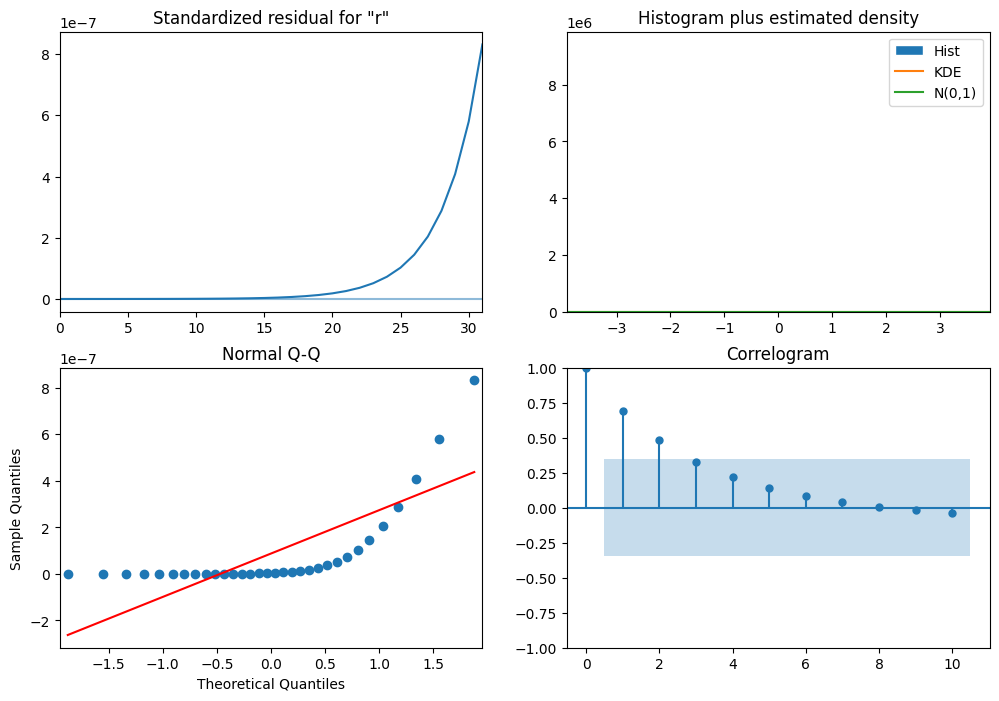

In [12]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()
